# PCA

### Для цієй домашки використаємо наступний простенький датасет: https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = data = pd.read_csv('C:\\Users\\Admin\\Downloads\\airlines.csv') 

### Опрацюємо наші дані, переробимо категоріальні ознаки в числовий формат

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
df.shape


(539383, 9)

In [9]:
#Приберемо айдішнік
df = df.drop('id', axis = 1)
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [10]:
X_cat = df[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
X_num = df.drop(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], axis=1)

In [11]:
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539380,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539381,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Delay']

X.head()

,Flight,Time,Length,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,-1.044258,-2.833092,1.038237,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.420778,-2.833092,1.280689,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.013509,-2.815110,0.467761,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.018415,-2.815110,0.895618,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.122133,-2.779144,0.995451,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Тепер натренуємо модель логістичної регресії.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, model_lr.predict_proba(X_test))
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Log Loss: {logloss:.2f}')
print('Classification Report:\n', class_report)

Accuracy: 0.64
Log Loss: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71     89680
           1       0.63      0.48      0.55     72135

    accuracy                           0.64    161815
   macro avg       0.64      0.63      0.63    161815
weighted avg       0.64      0.64      0.64    161815



### Зменшемо розмірність використовуючи PCA


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = explained_variance.cumsum()

n_components_95 = np.argmax(explained_variance_cumsum >= 0.95) + 1

print(f'Кількість компонент для 95% explained variance: {n_components_95}')

Кількість компонент для 95% explained variance: 108


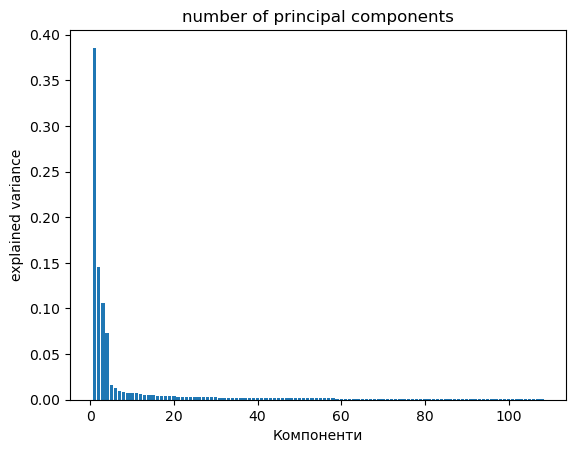

In [38]:

n_components = 108  
pca = PCA(n_components=n_components)

explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel('Компоненти')
plt.ylabel('explained variance')
plt.title('number of principal components')
plt.show()

### Тепер натренуємо наш класифікатор зі зменшенною розмірністю

In [36]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1)

model_lr_pca = LogisticRegression(solver='liblinear')
model_lr_pca.fit(X_train_pca, y_train)

y_pred_pca = model_lr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
logloss_pca = log_loss(y_test, model_lr_pca.predict_proba(X_test_pca))
class_report_pca = classification_report(y_test, y_pred_pca)

print(f'Accuracy (with PCA): {accuracy_pca:.2f}')
print(f'Log Loss (with PCA): {logloss_pca:.2f}')
print('Classification Report (with PCA):\n', class_report_pca)

Accuracy (with PCA): 0.64
Log Loss (with PCA): 0.63
Classification Report (with PCA):
               precision    recall  f1-score   support

           0       0.64      0.78      0.70     89680
           1       0.63      0.46      0.53     72135

    accuracy                           0.64    161815
   macro avg       0.64      0.62      0.62    161815
weighted avg       0.64      0.64      0.63    161815



####  Після зменшення розмірності даних з використанням PCAя із збереження 95 відсотків поясненої дисперсії, accuracy та log loss залишилися приблизно такими, як і до зменшення розмірності. Однак деякі метрики, такі як recall і f1-score, трохи знизилися...

#### У цьому випадку зменшення розмірності з PCA не призвело до суттєвого покращення або погіршення продуктивності моделі. Ми зберегли основну частину інформації, зберігаючи 95 відсотків поясненої дисперсії, але деякі метрикипогіршилися. Це може бути результатом того (моя особиста думка, можу помилятися), що PCA видалив частину інформації, яка була важливою...

In [39]:
import time

start_time_no_pca = time.time()
model_lr.fit(X_train, y_train)
end_time_no_pca = time.time()
time_no_pca = end_time_no_pca - start_time_no_pca


start_time_pca = time.time()
model_lr_pca.fit(X_train_pca, y_train)
end_time_pca = time.time()
time_pca = end_time_pca - start_time_pca

print(f"Час навчання без PCA: {time_no_pca:.2f} секунд")
print(f"Час навчання з PCA: {time_pca:.2f} секунд")

Время обучения модели без PCA: 7.56 секунд
Время обучения модели с PCA: 7.78 секунд


#### Як можна побачити, воно навіть не стало швидче...